<a href="https://colab.research.google.com/github/nalrob/Datos_Masivos_MCD/blob/main/Practica6_PesoMexicano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tradingeconomics

  Preparing metadata (setup.py) ... done
  Created wheel for tradingeconomics: filename=tradingeconomics-4.2.7-py3-none-any.whl size=40442 sha256=deeaf6b5efce24e8762dab7e872d7c1ca254328a62b96c6e3d0bc204cdee5c29
  Stored in directory: /root/.cache/pip/wheels/5b/19/e9/2d57d37e73f1c6d93dc640d30b090e758ff4d27cf354e2f00b
Successfully built tradingeconomics


In [ ]:
!git clone https://github.com/tradingeconomics/tradingeconomics-python.git


Cloning into 'tradingeconomics-python'...
remote: Enumerating objects: 432, done.
remote: Counting objects: 100% (432/432), done.
remote: Compressing objects: 100% (300/300), done.
remote: Total 432 (delta 154), reused 377 (delta 116), pack-reused 0
Receiving objects: 100% (432/432), 2.44 MiB | 12.25 MiB/s, done.
Resolving deltas: 100% (154/154), done.


In [ ]:
%cd tradingeconomics-python

/content/tradingeconomics-python


In [ ]:
!python setup.py install

/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        By 2023-Sep-26, you need to update your project and remove deprecated calls
        or your builds will no longer be supported.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
  

In [ ]:
import tradingeconomics as te
te.login('guest:guest')

'Logged with guest'

In [ ]:
te.getIndicatorData(country='mexico')

[{'Country': 'Mexico',
  'Category': 'Banks Balance Sheet',
  'Title': 'Mexico Banks Balance Sheet',
  'LatestValueDate': '2023-04-30T00:00:00',
  'LatestValue': 10335903.02,
  'Source': 'Banco de México',
  'SourceURL': 'http://www.banxico.org.mx',
  'Unit': 'MXN Million',
  'URL': '/mexico/banks-balance-sheet',
  'CategoryGroup': 'Money',
  'Adjustment': 'NSA',
  'Frequency': 'Monthly',
  'HistoricalDataSymbol': 'MEXICOBANBALSHE',
  'CreateDate': '2014-09-08T15:29:00',
  'FirstValueDate': '2000-12-31T00:00:00',
  'PreviousValue': 10169075.64,
  'PreviousValueDate': '2023-03-31T00:00:00'},
 {'Country': 'Mexico',
  'Category': 'Balance of Trade',
  'Title': 'Mexico Balance of Trade',
  'LatestValueDate': '2023-05-31T00:00:00',
  'LatestValue': -74.0,
  'Source': 'Instituto Nacional de Estadística y Geografía (INEGI)',
  'SourceURL': 'https://www.inegi.org.mx/',
  'Unit': 'USD Million',
  'URL': '/mexico/balance-of-trade',
  'CategoryGroup': 'Trade',
  'Adjustment': 'NSA',
  'Frequency'

In [ ]:
!pip install python-docx
!pip install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 49.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184491 sha256=f46b9a0d1fcf46c8112c5898705851f8c92e4f52e83d24aaf41cf11cbe56229f
  Stored in directory: /root/.cache/pip/wheels/80/27/06/837436d4c3bd989b957a91679966f207bfd71d358d63a8194d
Successfully built python-docx


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
from numpy import array

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_excel("/content/PesoMex.xlsx")

df.head()

,Fecha,ValorPeso,Precio crudo
0,2015-01-01,14.7348,ND
1,2015-01-02,14.7348,44.81
2,2015-01-03,14.7414,ND
3,2015-01-04,14.7414,ND
4,2015-01-05,14.7414,41.52


In [ ]:
# Unix-time to
df.Timestamp = pd.to_datetime(df.Fecha, unit='s')

# Resampling to daily frequency
df.index = df.Fecha
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

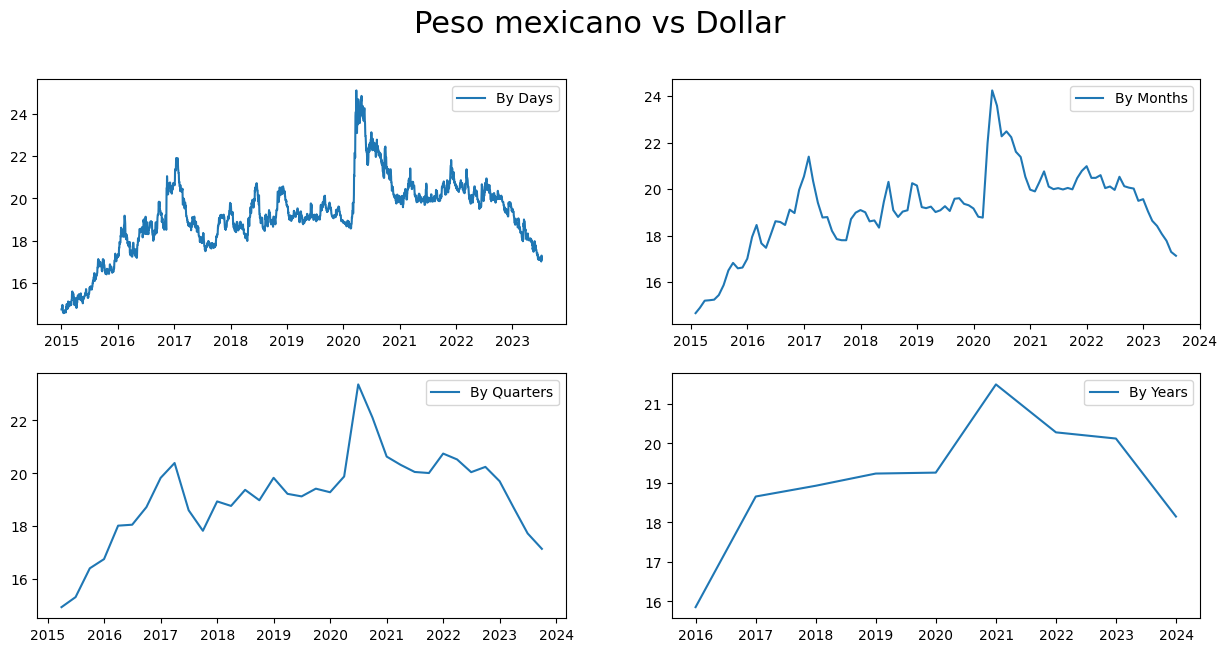

In [ ]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Peso mexicano vs Dollar', fontsize=22)

plt.subplot(221)
plt.plot(df.ValorPeso, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.ValorPeso, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.ValorPeso, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.ValorPeso, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

Dickey–Fuller test: p=0.104128


<Figure size 1500x700 with 0 Axes>

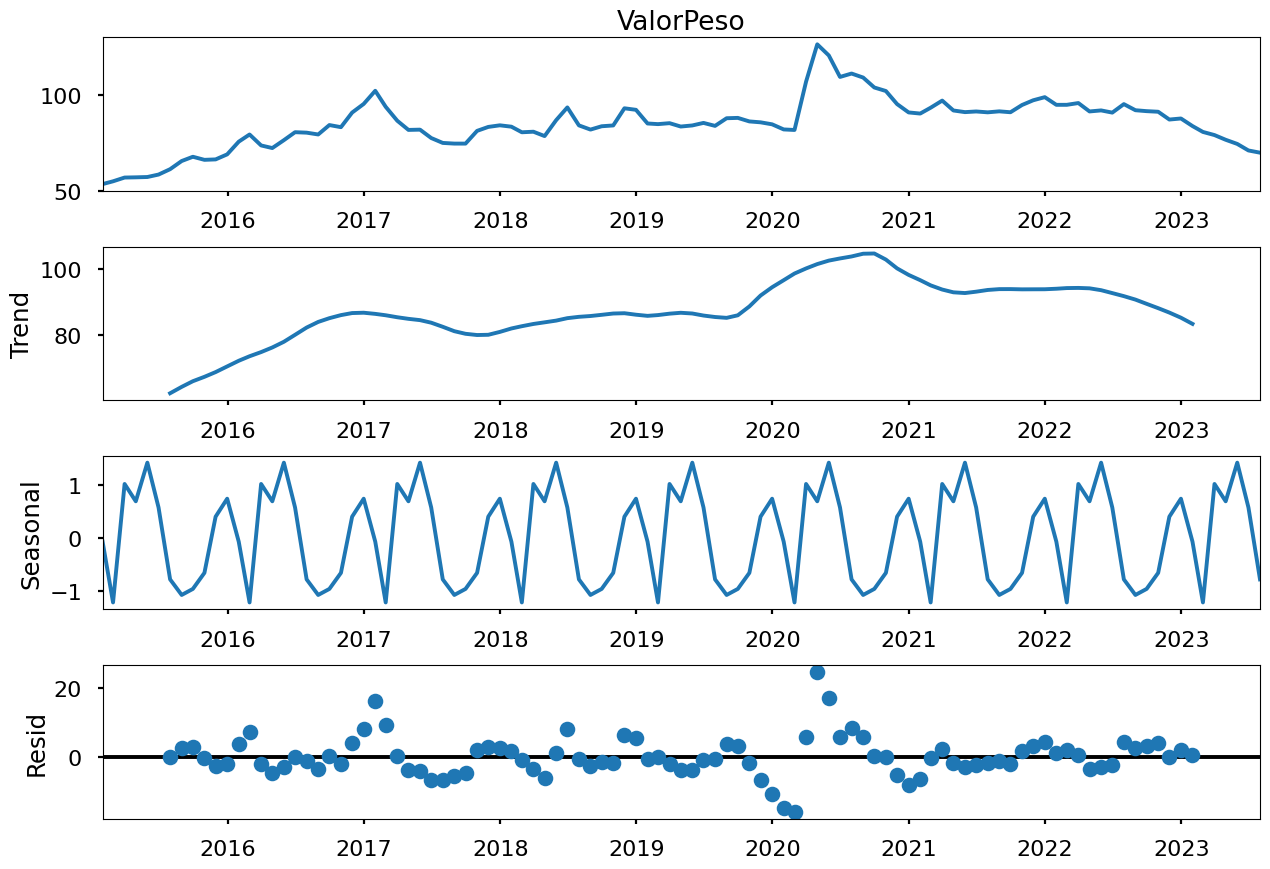

In [ ]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.ValorPeso).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.ValorPeso)[1])
plt.show()

In [ ]:
# Box-Cox Transformations
df_month['ValorPeso'], lmbda = stats.boxcox(df_month.ValorPeso)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.ValorPeso)[1])

Dickey–Fuller test: p=0.104144


In [ ]:
# Seasonal differentiation
df_month['prices_box_diff'] = df_month.ValorPeso - df_month.ValorPeso.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.113599


Dickey–Fuller test: p=0.000154


<Figure size 1500x700 with 0 Axes>

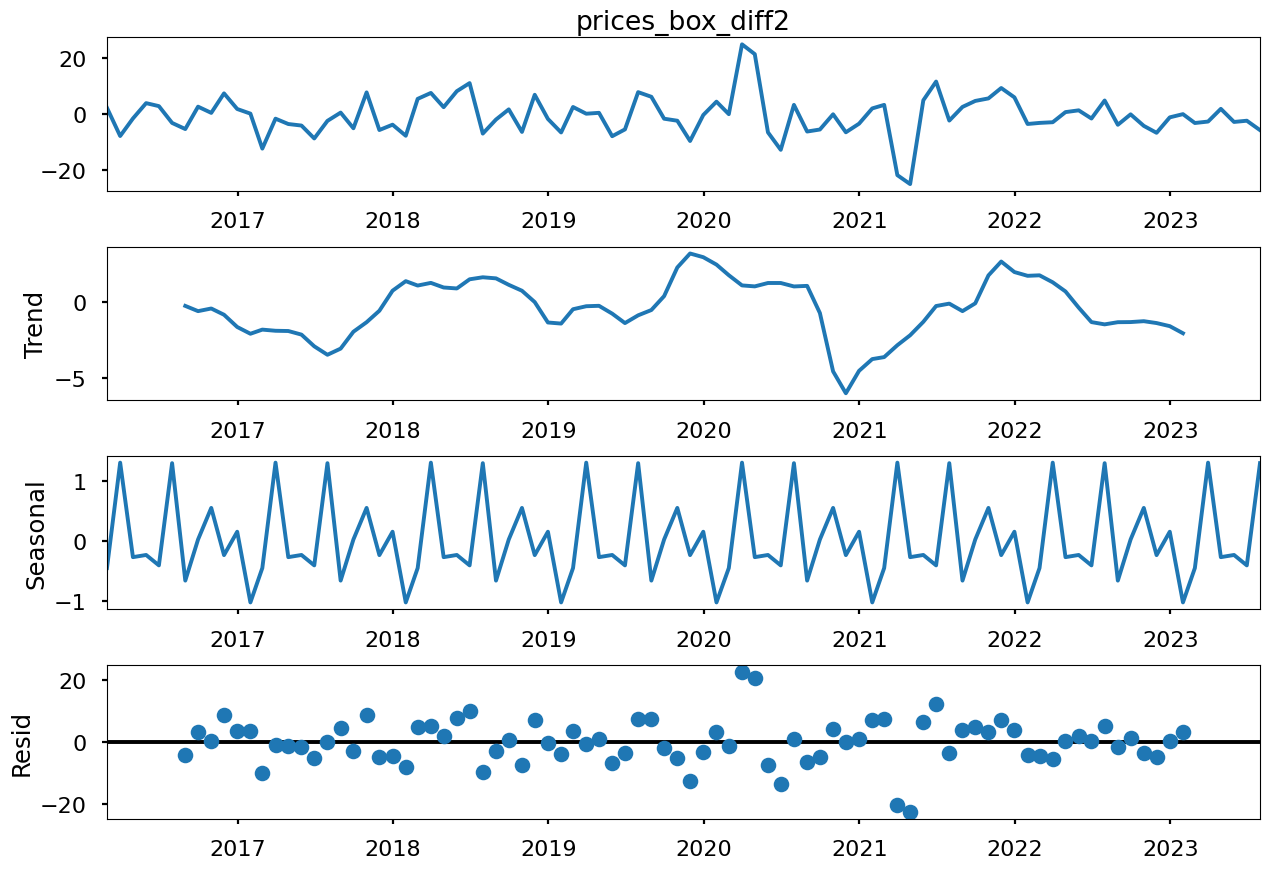

In [ ]:
# Regular differentiation
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_month.prices_box_diff2[13:]).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1])

plt.show()

In [ ]:
date_time = pd.to_datetime(df.pop('Fecha'), format='%d.%m.%Y %H:%M:%S')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ValorPeso,3114.0,19.164237,1.7571,14.5559,18.3532,19.17815,20.1443,25.1185


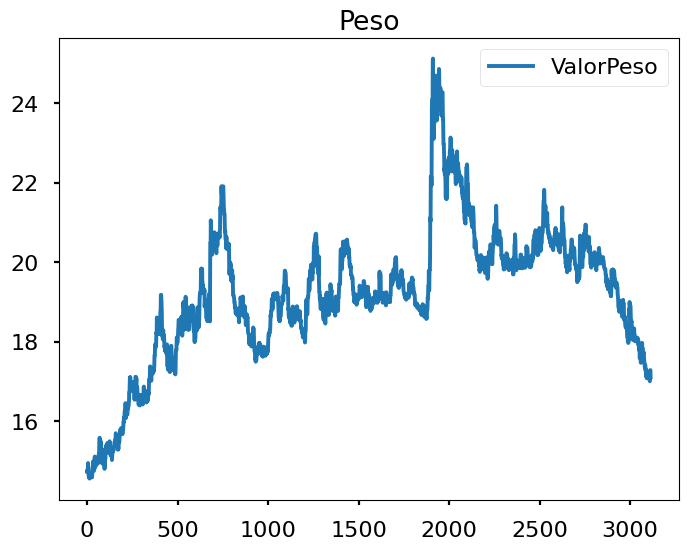

In [ ]:
df[['ValorPeso']].plot()
plt.title("Peso")
plt.show()

In [ ]:
df['Fecha'][1857]

Timestamp('2020-02-01 00:00:00')

In [ ]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 3114
Train data length : 2180
Validation data lenth : 934


In [ ]:
train_data = df[:length_train].iloc[:, [0, 1]]
train_data['Fecha'] = pd.to_datetime(train_data['Fecha'])  # converting to date time object
train_data

,Fecha,ValorPeso
0,2015-01-01,14.7348
1,2015-01-02,14.7348
2,2015-01-03,14.7414
3,2015-01-04,14.7414
4,2015-01-05,14.7414
...,...,...
2175,2020-12-15,20.1075
2176,2020-12-16,20.1778
2177,2020-12-17,20.1113
2178,2020-12-18,19.9513


In [ ]:
test_data = df[length_train:].iloc[:, [0, 1]]
test_data['Fecha'] = pd.to_datetime(test_data['Fecha'])  # converting to date time object
test_data

,Fecha,ValorPeso
2180,2020-12-20,19.8173
2181,2020-12-21,19.8173
2182,2020-12-22,19.9487
2183,2020-12-23,20.0905
2184,2020-12-24,20.0562
...,...,...
3109,2023-07-07,17.0040
3110,2023-07-08,17.2825
3111,2023-07-09,17.2825
3112,2023-07-10,17.2825


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Mxn Peso price')
    plt.plot(predicted, color='blue',label='Predicted Mxn Peso price')
    plt.title('Peso vs Dollar Prediction')
    plt.xlabel('Time')
    plt.ylabel('Mxn Peso Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
dataset = pd.read_excel("/content/PesoMex.xlsx", index_col='Fecha', parse_dates=['Fecha'])
dataset.head()

,ValorPeso,Precio crudo
Fecha,,
2015-01-01,14.7348,ND
2015-01-02,14.7348,44.81
2015-01-03,14.7414,ND
2015-01-04,14.7414,ND
2015-01-05,14.7414,41.52


In [ ]:
# Checking for missing values
training_set = dataset[:'2020'].iloc[:,0:1].values
test_set = dataset['2021':].iloc[:,0:1].values

In [ ]:
len(test_set)

922

In [ ]:
len(training_set)

2192

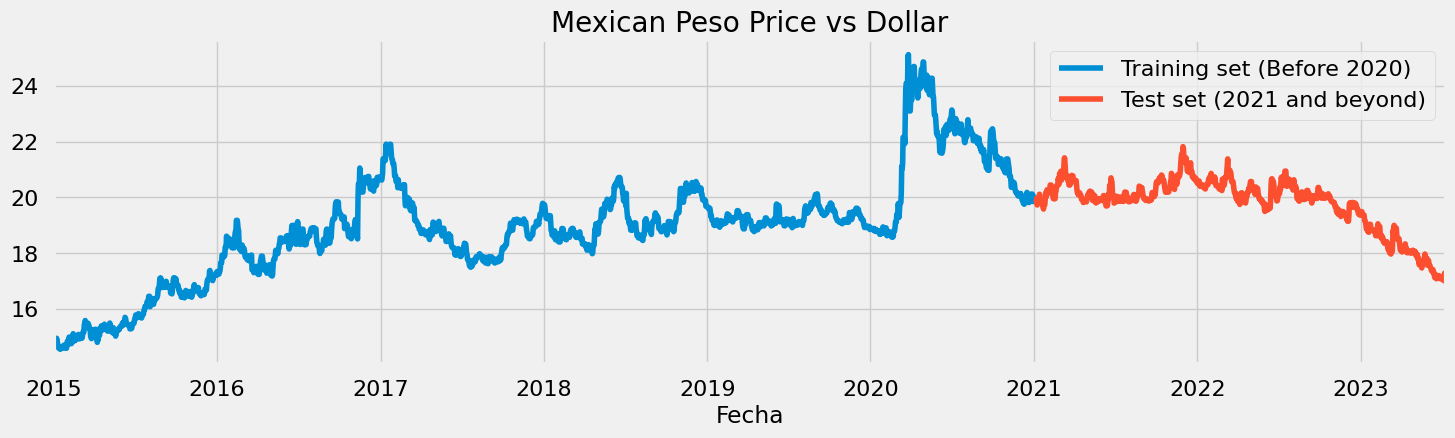

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["ValorPeso"][:'2020'].plot(figsize=(16,4),legend=True)
dataset["ValorPeso"]['2021':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2020)','Test set (2021 and beyond)'])
plt.title('Mexican Peso Price vs Dollar')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
len(data)

3114

In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
X_train = []
y_train = []
for i in range(60,922):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
27/27 [==============================] - 10s 88ms/step - loss: 0.0187
Epoch 2/50
27/27 [==============================] - 3s 93ms/step - loss: 0.0062
Epoch 3/50
27/27 [==============================] - 3s 101ms/step - loss: 0.0059
Epoch 4/50
27/27 [==============================] - 3s 96ms/step - loss: 0.0054
Epoch 5/50
27/27 [==============================] - 3s 117ms/step - loss: 0.0047
Epoch 6/50
27/27 [==============================] - 2s 91ms/step - loss: 0.0039
Epoch 7/50
27/27 [==============================] - 2s 91ms/step - loss: 0.0044
Epoch 8/50
27/27 [==============================] - 2s 91ms/step - loss: 0.0037
Epoch 9/50
27/27 [==============================] - 3s 99ms/step - loss: 0.0033
Epoch 10/50
27/27 [==============================] - 3s 111ms/step - loss: 0.0032
Epoch 11/50
27/27 [==============================] - 2s 89ms/step - loss: 0.0029
Epoch 12/50
27/27 [==============================] - 2s 90ms/step - loss: 0.0029
Epoch 13/50
27/27 [==============

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["ValorPeso"][:'2020'],dataset["ValorPeso"]['2021':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,982):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

29/29 [==============================] - 1s 43ms/step


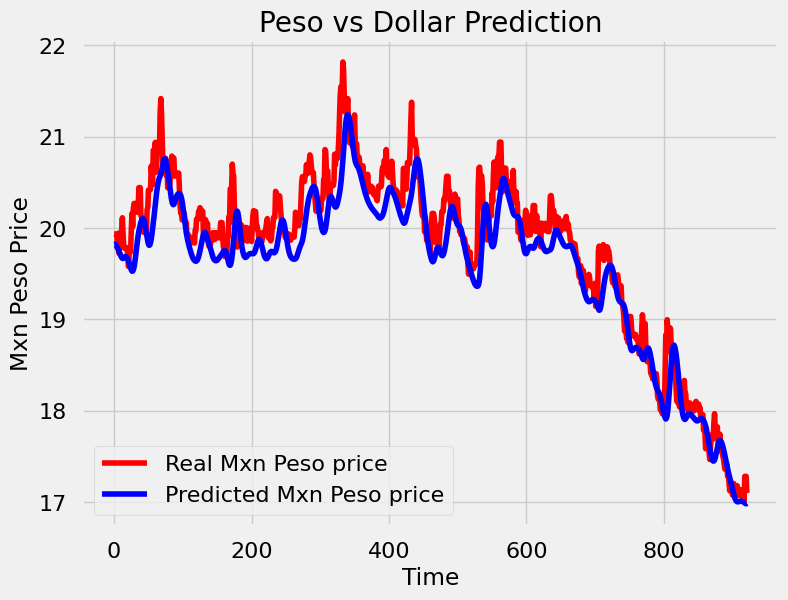

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 0.32306781100084014.


In [ ]:
# Obtener los últimos 60 registros del conjunto de datos original
inputs = dataset["ValorPeso"][len(dataset)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Preparar los datos de entrada para la predicción futura
X_future = []
X_future.append(inputs)
X_future = np.array(X_future)
X_future = np.reshape(X_future, (X_future.shape[0], X_future.shape[1], 1))

# Realizar la predicción futura de 20 valores
predicted_stock_price_future = []
for _ in range(20):
    predicted_value = regressor.predict(X_future)
    predicted_stock_price_future.append(predicted_value[0, 0])
    X_future = np.append(X_future[:, 1:, :], np.reshape(predicted_value, (1, 1, 1)), axis=1)

predicted_stock_price_future = np.array(predicted_stock_price_future)
predicted_stock_price_future = np.reshape(predicted_stock_price_future, (predicted_stock_price_future.shape[0], 1))

predicted_stock_price_future = sc.inverse_transform(predicted_stock_price_future)

print(predicted_stock_price_future)



1/1 [==============================] - 0s 46ms/step
[[16.998144]
 [17.008453]
 [17.014635]
 [17.014734]
 [17.008558]
 [16.997017]
 [16.981503]
 [16.963419]
 [16.943918]
 [16.923807]
 [16.903572]
 [16.883442]
 [16.863482]
 [16.843666]
 [16.823935]
 [16.804224]
 [16.78449 ]
 [16.764706]
 [16.744864]
 [16.724968]]


Gated Recurrent Units

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
6/6 [==============================] - 10s 385ms/step - loss: 0.0615
Epoch 2/50
6/6 [==============================] - 2s 299ms/step - loss: 0.0418
Epoch 3/50
6/6 [==============================] - 1s 166ms/step - loss: 0.0239
Epoch 4/50
6/6 [==============================] - 1s 171ms/step - loss: 0.0276
Epoch 5/50
6/6 [==============================] - 1s 161ms/step - loss: 0.0207
Epoch 6/50
6/6 [==============================] - 1s 168ms/step - loss: 0.0197
Epoch 7/50
6/6 [==============================] - 1s 164ms/step - loss: 0.0182
Epoch 8/50
6/6 [==============================] - 1s 165ms/step - loss: 0.0166
Epoch 9/50
6/6 [==============================] - 1s 169ms/step - loss: 0.0146
Epoch 10/50
6/6 [==============================] - 1s 165ms/step - loss: 0.0133
Epoch 11/50
6/6 [==============================] - 1s 239ms/step - loss: 0.0119
Epoch 12/50
6/6 [==============================] - 2s 261ms/step - loss: 0.0102
Epoch 13/50
6/6 [==============================]

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,60):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

IndexError: ignored

In [ ]:
len(X_test)

0

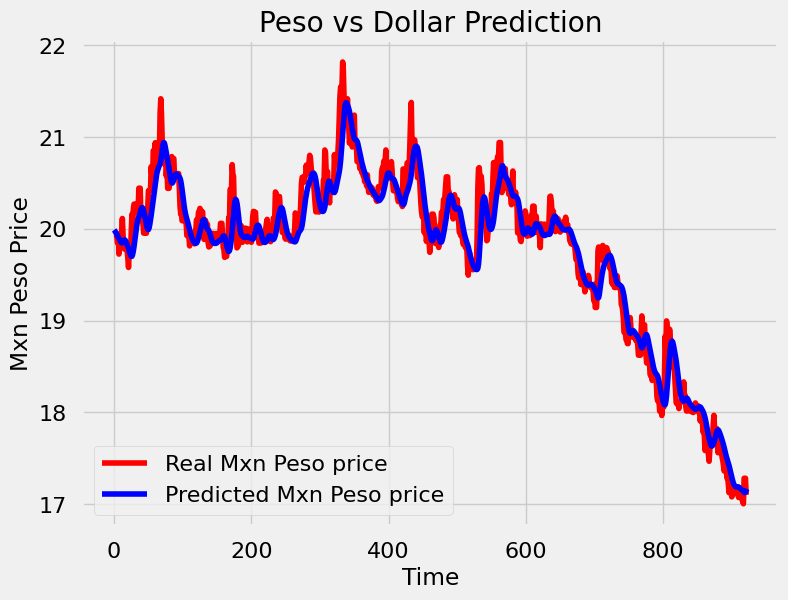

In [ ]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [ ]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

ValueError: ignored

Sequence Generation

In [ ]:
# Preparing sequence data
initial_sequence = X_train[2130,:]
sequence = []
for i in range(922):
    new_prediction = regressorGRU.predict(initial_sequence.reshape(initial_sequence.shape[1],initial_sequence.shape[0],1))
    initial_sequence = initial_sequence[1:]
    initial_sequence = np.append(initial_sequence,new_prediction,axis=0)
    sequence.append(new_prediction)
sequence = sc.inverse_transform(np.array(sequence).reshape(922,1))

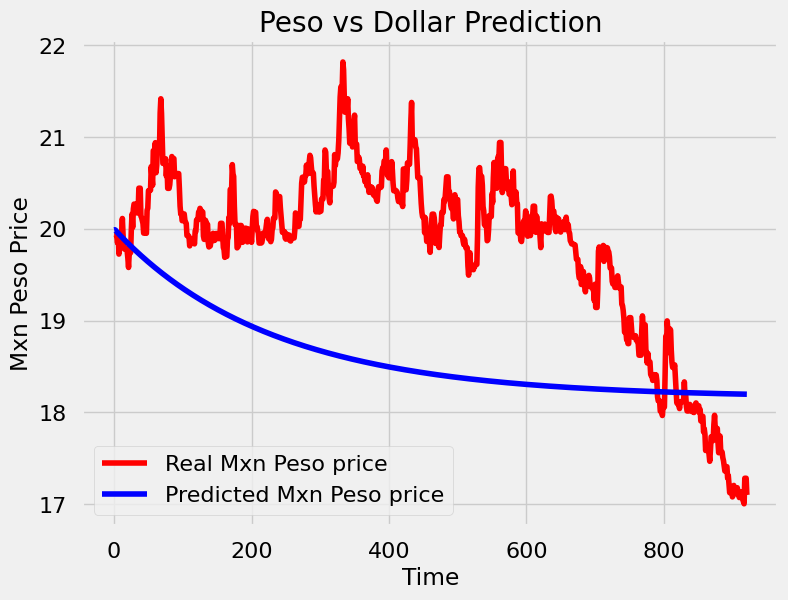

In [ ]:
# Visualizing the sequence
plot_predictions(test_set,sequence)

In [ ]:
# Evaluating the sequence
return_rmse(test_set,sequence)

The root mean squared error is 1.4540564277832067.
